# Test de rellanar NaN con Numpy

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import datetime as dt

In [9]:
nan=np.nan
arr=np.array([[  nan,  3,  nan,   7.,   2.,   6.,   5.],
       [  3.,  nan,   1.,   8.,  nan,   5.,  nan],
       [  4.,   9.,   6.,  nan,  nan,  nan,   7.]])
print(arr)
mask = np.isnan(arr)
print('mask: \n',mask)

idx = np.where(~mask,np.arange(mask.shape[1]),0)
print('idx:\n',idx)
print('np.maximum.accumulate: \n',np.maximum.accumulate(idx,axis=1, out=idx))
#print('np.minimum.accumulate: \n',np.minimum.accumulate(idx,axis=1, out=idx))

print('np.nonzeros(mask)[0]: \n',np.nonzero(mask)[0])
print('idx[mask]:\n',idx[mask])
arr[mask] = arr[np.nonzero(mask)[0], idx[mask]]
print(arr)


[[nan  3. nan  7.  2.  6.  5.]
 [ 3. nan  1.  8. nan  5. nan]
 [ 4.  9.  6. nan nan nan  7.]]
mask: 
 [[ True False  True False False False False]
 [False  True False False  True False  True]
 [False False False  True  True  True False]]
idx:
 [[0 1 0 3 4 5 6]
 [0 0 2 3 0 5 0]
 [0 1 2 0 0 0 6]]
np.maximum.accumulate: 
 [[0 1 1 3 4 5 6]
 [0 0 2 3 3 5 5]
 [0 1 2 2 2 2 6]]
np.nonzeros(mask)[0]: 
 [0 0 1 1 1 2 2 2]
idx[mask]:
 [0 1 0 3 5 2 2 2]
[[nan  3.  3.  7.  2.  6.  5.]
 [ 3.  3.  1.  8.  8.  5.  5.]
 [ 4.  9.  6.  6.  6.  6.  7.]]


In [23]:
x=np.array([  5.,  nan,  nan,   7.,   2.,   6.,   5.])
x_nan=np.array([nan,  nan,  nan,nan])
print('np.nanmin(x)',np.nanmin(x))
print('np.nansum(x)',np.nansum(x))

print('np.nanmin(x_nan)',np.nanmin(x_nan))
print('np.nansum(x_nan)',np.sum(x_nan))

print('np.isnan(x).all() : ',np.isnan(x).all())
print('np.isnan(x_nan).all() : ',np.isnan(x_nan).all())



np.nanmin(x) 2.0
np.nansum(x) 25.0
np.nanmin(x_nan) nan
np.nansum(x_nan) nan
np.isnan(x).all() :  False
np.isnan(x_nan).all() :  True


C:\Anaconda3\envs\framework\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: All-NaN slice encountered
  


# Función Yield y plot

In [35]:
def generator(N):
    #yield 10000
    for i in range(N):
        yield i

V=generator(10)
for v in V:
    print(v)

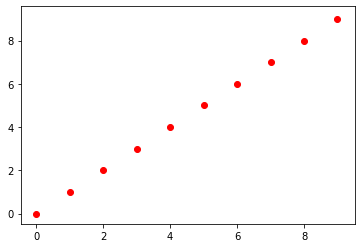

In [39]:
fig, ax = plt.subplots()
V=generator(10)
for v in V:
    ax.scatter(v,v,c='r')

# Array en Numpy

In [41]:
def generateXY(n):
    X=np.random.randint(0,10,n)
    Y=np.random.randint(0,10,n)
    return X,Y

In [46]:
XY=generateXY(10)
print('X,Y')
print(XY)

XY=np.array(XY).T
print(XY)

X,Y
(array([9, 6, 6, 8, 8, 6, 6, 1, 6, 9]), array([1, 7, 4, 1, 8, 4, 6, 5, 2, 3]))
[[9 1]
 [6 7]
 [6 4]
 [8 1]
 [8 8]
 [6 4]
 [6 6]
 [1 5]
 [6 2]
 [9 3]]


In [47]:
with open('test_save.csv','w') as f:
    print(type(f))

<class '_io.TextIOWrapper'>


## Conteo por columna de un arreglo numpy con NaN

In [128]:
n,m=5,5
A=np.array(np.random.rand(n,m),dtype=np.float16)
ri=np.random.randint
N=10
IJ=np.array([(ri(0,n),ri(0,m)) for i in range(N)])
A[IJ[:,0],IJ[:,1]]=np.nan
print(A)

umbral=0.5
for v in np.transpose(A):
    n=len(v[v>umbral])
    print(n)

[[0.07886 0.4187  0.9307      nan 0.939  ]
 [0.548   0.4204  0.838       nan 0.03854]
 [0.9956  0.905       nan     nan     nan]
 [0.3489  0.4785  0.96    0.6685      nan]
 [    nan     nan 0.647   0.4578      nan]]
2
1
4
1
1


In [130]:
n=1400000
m=144
A=np.random.rand(n,m).astype(np.float16)

In [145]:
print(A.shape)
t2=time.time()
cont=np.zeros(n)
for j in range(0,m):
    t1=time.time()
    a=np.where(np.isnan(A[:,j]),0,1)
    cont=cont+a
    #print('tiempo en buscar nan: %.2f y len: %d'%(time.time()-t1,len(a)))
print('tiempo en buscar nan total: %.2f '%(time.time()-t2))
print(cont[:10])

(1400000, 144)
tiempo en buscar nan total: 3.00 
[144. 144. 144. 144. 144. 144. 144. 144. 144. 144.]


In [143]:
v1=[1,2,3,4,np.nan,np.nan]
v2=[3,np.nan,3,2,1,np.nan]

x1=np.where(np.isnan(v1),0,1)
x2=np.where(np.isnan(v2),0,1)
print(x1)
print(x2)
print(x1+x2)

[1 1 1 1 0 0]
[1 0 1 1 1 0]
[2 1 2 2 1 0]


## Funciones vstack, hstack y concatenate

In [23]:
v1=np.empty((0,3))
v2=np.random.randint(0,3,(5,3))
v3=np.random.randint(0,3,(5,3))
V=[v1,v2,v3]
print(v1)
print(v2)
print(v3)
try:
    v=np.vstack([vi for vi in V[:1]])
    print('np.vstack((v1,v2)):\n ',v)
except:
    print('problema en las dimensiones en vstack')

try:
    v=np.hstack((v1,v2))
    print('np.hstack((v1,v2)):\n',v)
except:
    print('problema en las dimensiones en hstack')


try:
    v=np.concatenate(v1,v2)
    print(v)
except:
    print('problema en las dimensiones en concatenate')


[]
[[2 1 1]
 [0 0 1]
 [1 1 0]
 [1 0 1]
 [1 2 2]]
[[1 2 0]
 [2 0 2]
 [2 2 1]
 [2 0 0]
 [2 2 2]]
np.vstack((v1,v2)):
  []
problema en las dimensiones en hstack
problema en las dimensiones en concatenate


# Calculo intermitencia

In [11]:
n=10
indexs=np.array([i+1 for i in range(0,n)])
t0=dt.datetime.now()
t=[t0+ dt.timedelta(minutes=3)*i for i in range(0,n)]
print(indexs)
print(t)

[ 1  2  3  4  5  6  7  8  9 10]
[datetime.datetime(2020, 3, 17, 22, 45, 58, 188163), datetime.datetime(2020, 3, 17, 22, 48, 58, 188163), datetime.datetime(2020, 3, 17, 22, 51, 58, 188163), datetime.datetime(2020, 3, 17, 22, 54, 58, 188163), datetime.datetime(2020, 3, 17, 22, 57, 58, 188163), datetime.datetime(2020, 3, 17, 23, 0, 58, 188163), datetime.datetime(2020, 3, 17, 23, 3, 58, 188163), datetime.datetime(2020, 3, 17, 23, 6, 58, 188163), datetime.datetime(2020, 3, 17, 23, 9, 58, 188163), datetime.datetime(2020, 3, 17, 23, 12, 58, 188163)]


In [21]:
x=np.array([0,0,0,0,0,1,1,1,1,1])
mu=np.sum(indexs*x)/np.sum(x)
sigma=np.std(x)
print(mu)
print(sigma)
s=0
for i in range(0,n):
    s+=1
print(s)

8.0
0.5
10


[ 0.          0.03333333  0.06666667  0.1         0.13333333 -0.16666667
 -0.13333333 -0.1        -0.06666667 -0.03333333]


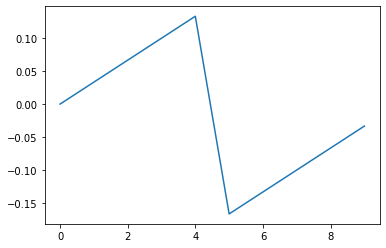

In [25]:
x=np.array([0,0,0,0,0,1,1,1,1,1])
fr=np.fft.fft(x)
m = x.size
timestep = 3
freq = np.fft.fftfreq(m, d=timestep)
print(freq)
fig, ax = plt.subplots()
ax.plot(freq)

[ 0.          0.03333333  0.06666667  0.1         0.13333333 -0.16666667
 -0.13333333 -0.1        -0.06666667 -0.03333333]


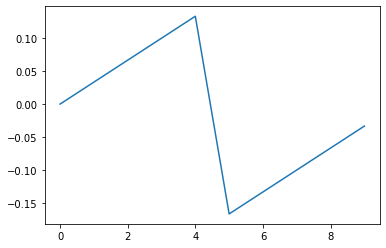

In [26]:
x=np.array([1,1,1,1,1,1,1,1,1,1])
fr=np.fft.fft(x)
m = x.size
timestep = 3
freq = np.fft.fftfreq(m, d=timestep)
print(freq)
fig, ax = plt.subplots()
ax.plot(freq)

[ 0.          0.03333333  0.06666667  0.1         0.13333333 -0.16666667
 -0.13333333 -0.1        -0.06666667 -0.03333333]


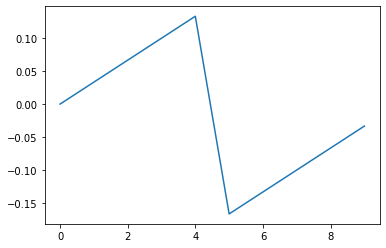

In [27]:
x=np.array([1,0,1,0,1,0,1,0,1,0])
fr=np.fft.fft(x)
m = x.size
timestep = 3
freq = np.fft.fftfreq(m, d=timestep)
print(freq)
fig, ax = plt.subplots()
ax.plot(freq)

In [38]:
p=np.empty(10,dtype=np.float16)
print(p)
p[:]=np.nan
print(p)

x=np.zeros(10)
print(x)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[nan nan nan nan nan nan nan nan nan nan]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [39]:
L=['hola',1,3]

try:
    L.remove('hola')
except:
    pass
print(L)

[1, 3]


In [42]:
A=np.random.rand(3,4)
a=np.random.rand(4)
n,m=A.shape
print(n,m)
n=a.shape
print(n)

3 4
(4,)


## Substract

In [47]:
n,m=1000000,144
x1 = np.random.rand(n,m)
x2 = x1[:,0]
t1=time.time()
x=np.transpose(np.subtract(np.transpose(x1), x2))
print('tiempo en sustraer el primer elementos: ',time.time()-t1)
#print(x1)
#print(x2)
#print(np.transpose(x))


tiempo en sustraer el primer elementos:  0.8279297351837158


In [49]:
for i in [1,2,3,4,5]:
    i=1
    print(i)
    

1
1
1
1
1


# File H5

In [8]:
import h5py
x=np.random.rand(10)
y=np.random.randint(0,5,10)

#with h5py.File('fileh5.h5', 'a') as  hf:
#    hf["x"]=np.random.rand(10)
#    hf["z"]=np.random.randint(5,10,10)
#    hf['x'][-1]=1000
    
with h5py.File('fileh5.h5', 'r') as  hf:
    print(np.array(hf['x']))
    print(np.array(hf['z']))
    print(np.array(hf['x'][[0,2,4]]))
    print(np.array(hf['x'])[[0,2,4]])


    
    print(np.array(hf['x']))
    #print(np.array(hf["x","y"]))


    

[0.00478279 0.95999248 0.40721608 0.93552592 0.95737848 0.93409735
 0.87719026 0.36605965 0.71230713 0.80203657]
[8 9 7 5 8 5 9 9 9 7]
[0.00478279 0.40721608 0.95737848]
[0.00478279 0.40721608 0.95737848]
[0.00478279 0.95999248 0.40721608 0.93552592 0.95737848 0.93409735
 0.87719026 0.36605965 0.71230713 0.80203657]


# Cambiar extensión

In [25]:
import os
path=r'D:\EMT\AAV\Datos y Algoritmos\Data Out\Cubo de Datos\Cubo de Datos 2019\DataCube_IBIS1_from_19_Ene_01-00_02_to_19_Jul_01-00_01.csv'
new_extension='h5'
pre, ext = os.path.splitext(path)
print(pre+'.h5')
#os.rename(renamee, pre + new_extension)


path2=r'D:\Respaldo OUT\IBIS_2\MASTER_MLP_18012020_IBIS-2_MLP_24122019\Data Cube\MASTER_MLP_18012020_IBIS-2_MLP_24122019.h5'
pre, ext = os.path.splitext(path2)
print(path2.replace('MASTER_MLP_18012020_IBIS-2_MLP_24122019.','otro.'))


filename, ext = os.path.splitext(os.path.basename(path))
print(filename+ext)

D:\EMT\AAV\Datos y Algoritmos\Data Out\Cubo de Datos\Cubo de Datos 2019\DataCube_IBIS1_from_19_Ene_01-00_02_to_19_Jul_01-00_01.h5
D:\Respaldo OUT\IBIS_2\MASTER_MLP_18012020_IBIS-2_MLP_24122019\Data Cube\otro.h5
DataCube_IBIS1_from_19_Ene_01-00_02_to_19_Jul_01-00_01.csv


In [96]:
import new_tool_utility as ntu

StrDate='2019-01-01 00:19:39'
date=ntu.str_to_datetime(StrDate)
print(type(date))

<class 'datetime.datetime'>


In [107]:
v=['1','2','3','nan']
for value in map(float,v):
    print(value,type(value))

1.0 <class 'float'>
2.0 <class 'float'>
3.0 <class 'float'>
nan <class 'float'>


# Eliminando un objeto de una lista

In [121]:
class Conjunto(object):
    def __init__(self,idd,arrayNumRandom):
        self._id=idd
        self._array=arrayNumRandom
    def get_array(self):
        return self._array
    def __str__(self):
        return str(self._id)

def print_conjuntos(ListaConjuntos):
    s=''
    for conjunto in ListaConjuntos:
        s=s+str(conjunto._id)+' - '
    print(s)
    
ListaConjunto=[]
for i in range(10):
    n=np.random.randint(5,10)
    array=np.random.rand(n)
    ListaConjunto.append(Conjunto(i,array))

print_conjuntos(ListaConjunto)
del ListaConjunto[4]
print_conjuntos(ListaConjunto)

conjunto0=ListaConjunto[0]
ListaConjunto.remove(conjunto0)
print_conjuntos(ListaConjunto)


0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 
0 - 1 - 2 - 3 - 5 - 6 - 7 - 8 - 9 - 
1 - 2 - 3 - 5 - 6 - 7 - 8 - 9 - 


# Time Delta
comparación entre fechas y numeros

In [124]:
import datetime as dt

t=dt.timedelta(minutes=15).total_seconds()/60
print(t)
print(t>16)

15.0
False


# Creando .exe desde .py con pyinstaller 

1. Instalar pyinstaller en conda : conda install -c conda-forge pyinstaller
2. abrir cmd e ir al directorio cd pathdirectorio
3. Luego escribir: pyinstaller path/mycodigo.py

# Proceso con archivos .bat

## Ejecutar un archivo .bat con python

In [19]:
import subprocess
subprocess.call([r'D:\EMT\AAV\storage_data\codigo_test\process_example.bat'])

0

# Consultar si un proceso bat esta en ejecución

In [15]:
import psutil

P=(p.name() for p in psutil.process_iter())

for p in P:
    print(p)
    if "process_example" in p:
        print('el proceso %s se esta ejecutando '%(p))
    

System Idle Process
System
WUDFHost.exe
Registry
unsecapp.exe
python.exe
smss.exe
RuntimeBroker.exe
svchost.exe
csrss.exe
svchost.exe
wininit.exe
csrss.exe
crashpad_handler.exe
services.exe
lsass.exe
svchost.exe
svchost.exe
svchost.exe
fontdrvhost.exe
chrome.exe
winlogon.exe
fontdrvhost.exe
dwm.exe
svchost.exe
svchost.exe
svchost.exe
svchost.exe
svchost.exe
svchost.exe
svchost.exe
svchost.exe
TeraCopyService.exe
svchost.exe
svchost.exe
svchost.exe
NVDisplay.Container.exe
svchost.exe
svchost.exe
svchost.exe
NVDisplay.Container.exe
svchost.exe
svchost.exe
svchost.exe
svchost.exe
chrome.exe
svchost.exe
svchost.exe
svchost.exe
Memory Compression
svchost.exe
svchost.exe
smartscreen.exe
dasHost.exe
igfxCUIService.exe
dllhost.exe
svchost.exe
svchost.exe
cmd.exe
explorer.exe
SearchProtocolHost.exe
svchost.exe
GoogleDriveFS.exe
svchost.exe
svchost.exe
svchost.exe
sublime_text.exe
jupyter-notebook.exe
svchost.exe
chrome.exe
svchost.exe
svchost.exe
svchost.exe
svchost.exe
AsLdrSrv.exe
spoolsv.exe

# Formato string

In [28]:
info='date from csv4d: %s; length save data:  %d; distance max y min: (%.3f,%.3f); date save: %s'.format()
print(info%(dt.datetime.today(),4,3.4445,2.34321,dt.datetime.now()))

date from csv4d: 2020-03-23 22:44:58.781657; length save data:  4; distance (max,min): (3.445,2.343); date save: 2020-03-23 22:44:58.782654


In [32]:
print('%.3f'%(np.nan))
print('%s'%(None))

nan
None
